# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [2]:
data = pd.read_csv('/kaggle/input/istanbul-airbnb-dataset/listings.csv' , sep = "," , encoding = "utf-8")
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,4826,The Place,6603,Kaan,NaN,Uskudar,41.05650,29.05367,Entire home/apt,720,1,1,2009-06-01,0.01,1,365
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06984,29.04545,Entire home/apt,816,365,41,2018-11-07,0.33,2,279
2,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,NaN,Beyoglu,41.03254,28.98153,Entire home/apt,233,30,13,2018-05-04,0.19,1,289
3,28277,Duplex Apartment with Terrace,121607,Alen,NaN,Sisli,41.04471,28.98567,Hotel room,761,3,0,NaN,NaN,19,365
4,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.09048,29.05559,Entire home/apt,823,3,0,NaN,NaN,1,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23723,43963636,Avcılarda özel oda,297895734,Aykhan,NaN,Avcilar,40.97870,28.72668,Private room,171,1,0,NaN,NaN,2,175
23724,43966333,1+1 LUXURY RESIDENCEIN MASLAK HYGIENE CERTIFIC...,69089629,Metin,NaN,Sisli,41.11798,29.00886,Entire home/apt,597,1,0,NaN,NaN,15,363
23725,43966442,The Rooms In Beyoğlu,286090194,Seyfulla,NaN,Beyoglu,41.03839,28.98831,Private room,144,1,0,NaN,NaN,7,210
23726,43967082,Istanbul dream apartement,288314755,Adil,NaN,Esenyurt,41.01065,28.67427,Entire home/apt,603,2,0,NaN,NaN,1,90


# Data Describe

In [3]:
df=data.copy()

In [4]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,4826,The Place,6603,Kaan,NaN,Uskudar,41.05650,29.05367,Entire home/apt,720,1,1,2009-06-01,0.01,1,365
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06984,29.04545,Entire home/apt,816,365,41,2018-11-07,0.33,2,279
2,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,NaN,Beyoglu,41.03254,28.98153,Entire home/apt,233,30,13,2018-05-04,0.19,1,289
3,28277,Duplex Apartment with Terrace,121607,Alen,NaN,Sisli,41.04471,28.98567,Hotel room,761,3,0,NaN,NaN,19,365
4,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.09048,29.05559,Entire home/apt,823,3,0,NaN,NaN,1,88


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23728 entries, 0 to 23727
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              23728 non-null  int64  
 1   name                            23674 non-null  object 
 2   host_id                         23728 non-null  int64  
 3   host_name                       23727 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   23728 non-null  object 
 6   latitude                        23728 non-null  float64
 7   longitude                       23728 non-null  float64
 8   room_type                       23728 non-null  object 
 9   price                           23728 non-null  int64  
 10  minimum_nights                  23728 non-null  int64  
 11  number_of_reviews               23728 non-null  int64  
 12  last_review                     

In [6]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.372800e+04,2.372800e+04,0.0,23728.000000,23728.000000,23728.000000,23728.000000,23728.000000,11353.000000,23728.000000,23728.000000
mean,2.913711e+07,1.493973e+08,NaN,41.028416,28.982111,484.643248,4.525202,7.870828,0.710177,5.861767,227.709921
std,1.305964e+07,1.155452e+08,NaN,0.045713,0.127503,1973.884093,27.614191,23.229127,0.902913,16.535368,146.607077
min,4.826000e+03,6.603000e+03,NaN,40.813960,28.019010,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,2.101860e+07,3.285440e+07,NaN,41.005120,28.973210,137.000000,1.000000,0.000000,0.130000,1.000000,89.000000
50%,3.398637e+07,1.477727e+08,NaN,41.031850,28.983485,247.000000,1.000000,0.000000,0.330000,2.000000,302.000000
75%,3.965902e+07,2.588145e+08,NaN,41.048530,29.020050,446.000000,3.000000,4.000000,0.950000,5.000000,365.000000
max,4.397093e+07,3.522041e+08,NaN,41.479030,29.907780,76922.000000,1125.000000,345.000000,9.200000,176.000000,365.000000


# Check The null values

In [7]:
df.isnull().sum()

id                                    0
name                                 54
host_id                               0
host_name                             1
neighbourhood_group               23728
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       12375
reviews_per_month                 12375
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<AxesSubplot:>

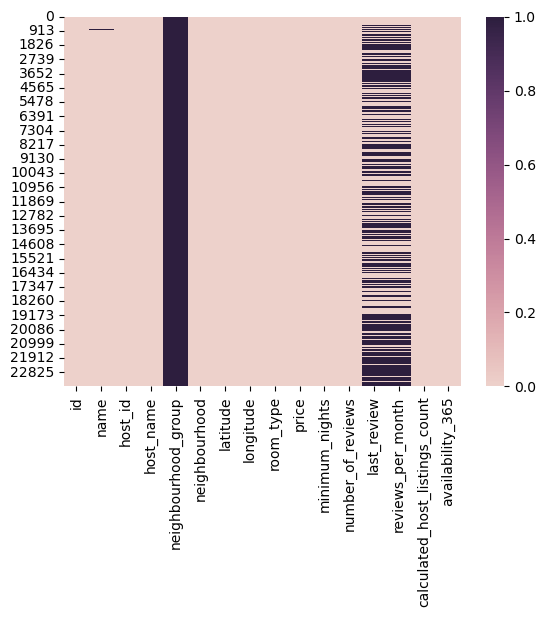

In [8]:
sns.heatmap( df.isnull(),cmap=sns.cubehelix_palette(as_cmap=True))

# Data cleaning and data visualization

In [9]:
fig = px.pie(df, names='room_type', title='room_type',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [10]:
df['room_type'].value_counts()

Entire home/apt    11848
Private room       10251
Hotel room           954
Shared room          675
Name: room_type, dtype: int64

In [11]:
fig = px.pie(df, values='price', names='room_type', color='room_type',
             color_discrete_map={'Entire home/apt':'lightcyan',
                                 'Private room':'cyan',
                                 'Hotel room':'royalblue',
                                 'Shared room':'darkblue'})
fig.show()

In [12]:
import folium
from folium.plugins import FastMarkerCluster
latitudes = np.array(df['latitude'])
longitudes = np.array(df['longitude'])
la_mean = latitudes.mean()
lo_mean = longitudes.mean()
locations = list(zip(latitudes, longitudes))

m = folium.Map(location=[la_mean, lo_mean], zoom_start= 11.5)
FastMarkerCluster(data=locations).add_to(m)
m

In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

id                                    0
name                                 54
host_id                               0
host_name                             1
neighbourhood_group               23728
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       12375
reviews_per_month                 12375
calculated_host_listings_count        0
availability_365                      0
dtype: int64

I will drop the column of neighborhood_group Because it values contains more than 95%.

In [15]:
df.drop(columns = ["neighbourhood_group"], inplace = True)

In [16]:
fill_list = df['last_review'].dropna()
df['last_review'] = df['last_review'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

<AxesSubplot:xlabel='reviews_per_month', ylabel='Density'>

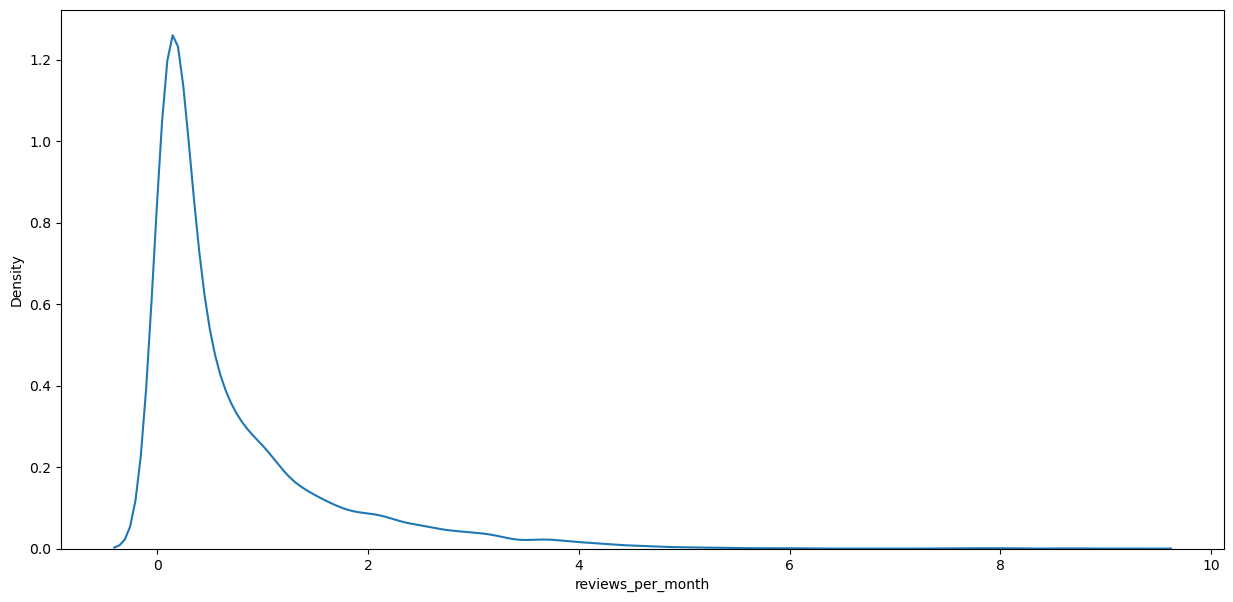

In [17]:
plt.figure(figsize = (15,7))
sns.kdeplot(x = df["reviews_per_month"])

In [18]:
fill_list = df['reviews_per_month'].dropna()
df['reviews_per_month'] = df['reviews_per_month'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))

<AxesSubplot:xlabel='reviews_per_month', ylabel='Density'>

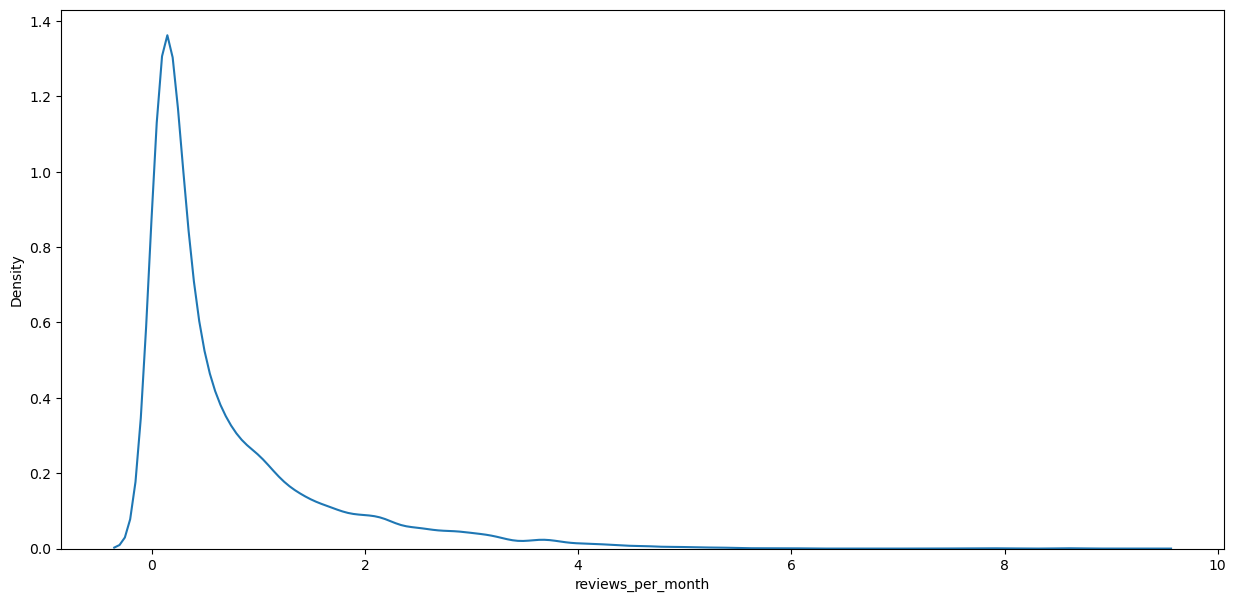

In [19]:
plt.figure(figsize = (15,7))
sns.kdeplot(x = df["reviews_per_month"])

In [20]:
df.isnull().sum()

id                                 0
name                              54
host_id                            0
host_name                          1
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [21]:
df.dropna(subset=['name'],inplace=True)

In [22]:
df.dropna(subset=['host_name'],inplace=True)

In [23]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [24]:
df['neighbourhood'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Uskudar
1        Besiktas
2         Beyoglu
3           Sisli
4         Sariyer
           ...   
23723     Avcilar
23724       Sisli
23725     Beyoglu
23726    Esenyurt
23727        Sile
Name: neighbourhood, Length: 23673, dtype: object>

# Encoding the object Dataset

In [25]:
df.describe(include=object)

,name,host_name,neighbourhood,room_type,last_review
count,23673,23673,23673,23673,23673
unique,22689,4897,39,4,1424
top,İstanbul Birden fazla bölümden oluşan bina,Mehmet,Beyoglu,Entire home/apt,2020-03-15
freq,31,367,6358,11832,394


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
cols = ['name', 'host_name', 'neighbourhood','room_type','last_review']

df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23673 entries, 0 to 23727
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              23673 non-null  int64  
 1   name                            23673 non-null  int64  
 2   host_id                         23673 non-null  int64  
 3   host_name                       23673 non-null  int64  
 4   neighbourhood                   23673 non-null  int64  
 5   latitude                        23673 non-null  float64
 6   longitude                       23673 non-null  float64
 7   room_type                       23673 non-null  int64  
 8   price                           23673 non-null  int64  
 9   minimum_nights                  23673 non-null  int64  
 10  number_of_reviews               23673 non-null  int64  
 11  last_review                     23673 non-null  int64  
 12  reviews_per_month               

# Correlation Graph of the Istanbul Airbnb Dataset

<AxesSubplot:>

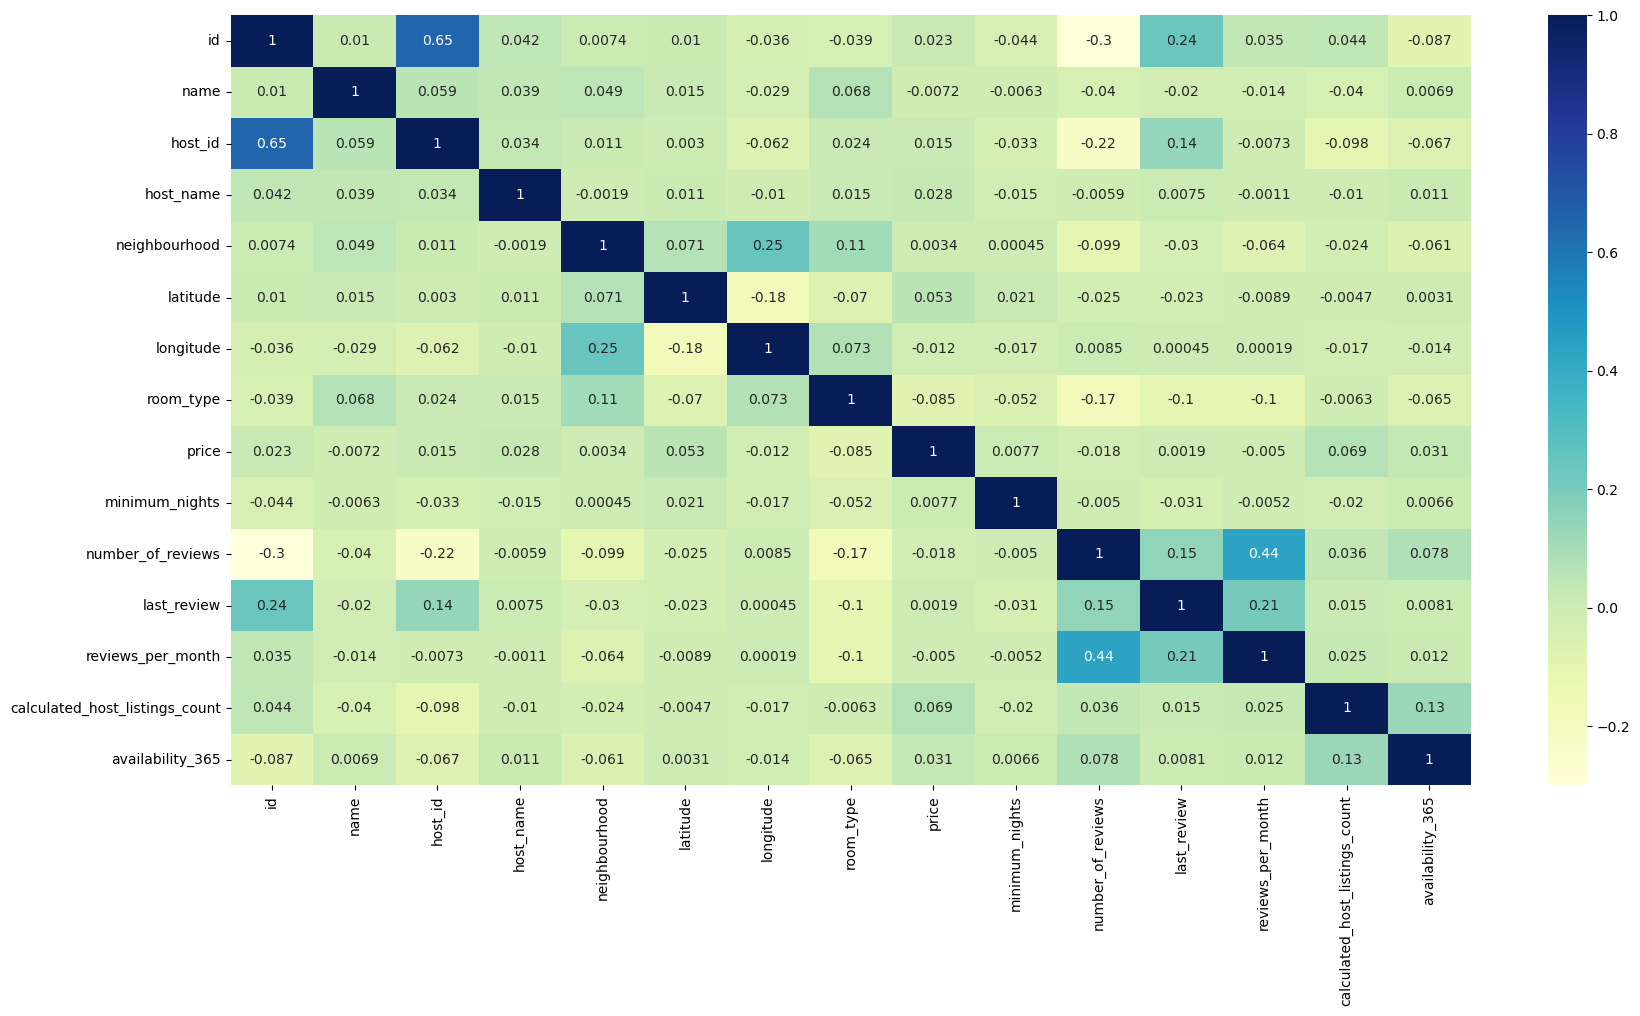

In [29]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr() , annot = True , cmap = "YlGnBu")

# train_test_split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x= df.drop(['price'] , axis = 1).values
y= df['price'].values

In [32]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state= 42)

In [33]:
x_train.shape

(17754, 14)

In [34]:
x_test.shape

(5919, 14)

# Modeling

# RandomForestRegressor

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
ss=StandardScaler()
x_train =ss.fit_transform(x_train )
x_test=ss.transform(x_test)

In [37]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor()
random_forest.fit(x_train , y_train)
print("Random Forest Training Accuracy:", random_forest.score(x_train , y_train))
print("Random Forest Testing Accuracy:", random_forest.score(x_test , y_test))

Random Forest Training Accuracy: 0.8814356003577033
Random Forest Testing Accuracy: 0.6633141197328729


In [38]:
y_pred = random_forest.predict(x_test)
y_pred

y_pred = random_forest.predict(x_test)
df3 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df3.head(20)

,Y_test,Y_pred
0,62,118.54
1,158,264.11
2,103,229.53
3,617,423.85
4,350,325.18
5,62,120.25
6,576,358.98
7,247,563.79
8,501,781.46
9,171,194.32


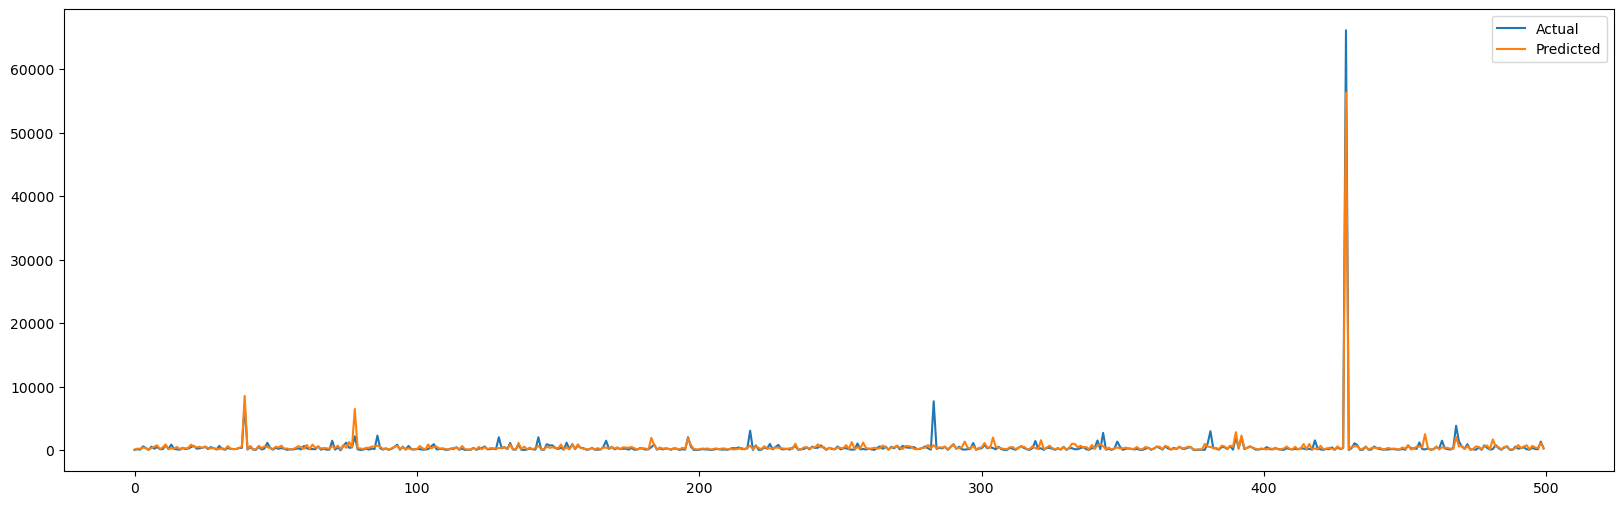

In [39]:
plt.figure(figsize= (20,6))

plt.plot(df3[:500])
plt.legend(["Actual" , "Predicted"])

In [40]:
from sklearn.metrics import r2_score

In [41]:
reg_score = r2_score(y_test , y_pred)
reg_score

0.6633141197328729